In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
file = 'medical_students_dataset.csv'
df = pd.read_csv(file)
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [7]:
def dataset_diagnosis(df, missing_threshold=0.5, top_unique=5):
    print(f"Общая информация: {len(df)} строк, {len(df.columns)} колонок")

    # Пропущенные значения
    missing = df.isnull().sum()
    print(f'Пропущенные значения: {missing}')

    # Дубликаты
    duplicates = df.duplicated().sum()
    print(f"Полных дубликатов: {duplicates} ({duplicates/len(df):.1%})")

    # Базовая статистика для числовых колонок
    numeric_cols = df.select_dtypes(include='number').columns
    if not numeric_cols.empty:
        print("\nБазовая статистика для числовых колонок:")
        print(df[numeric_cols].describe().round(2))

dataset_diagnosis(df)

Общая информация: 200000 строк, 13 колонок
Пропущенные значения: Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
Полных дубликатов: 7644 (3.8%)

Базовая статистика для числовых колонок:
       Student ID        Age     Height     Weight        BMI  Temperature  \
count   180000.00  180000.00  180000.00  180000.00  180000.00    180000.00   
mean     49974.04      26.02     174.95      69.97      23.34        98.60   
std      28879.64       4.89      14.45      17.32       7.03         0.50   
min          1.00      18.00     150.00      40.00      10.07        96.40   
25%      24971.75      22.00     162.48      54.97      17.86        98.26   
50%      49943.50      26.00     174.90      69.98      22.67        

In [165]:
from sklearn.preprocessing import OrdinalEncoder
# Кодидирование типа объект
encoder = OrdinalEncoder()
df[['Gender', 'Blood Type', 'Diabetes', 'Smoking']] = encoder.fit_transform(df[['Gender', 'Blood Type', 'Diabetes', 'Smoking']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  float64
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  float64
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  float64
 12  Smoking         180000 non-null  float64
dtypes: float64(13)
memory usage: 19.8 MB


In [166]:
#Удаление дубликатов и пропущенных значений
data = df.drop_duplicates()

Замена колонок для задачи. Все преобразования основаны на исходных данных, поэтому связи между признаками не теряются.

In [167]:
# Замена пропущенных значений
cols = data.select_dtypes(include=[np.number]).columns.tolist()
for col in cols:
    data.loc[:, col] = data[col].fillna(data[col].mean())

In [168]:
data['Height'] = data['Height'].round()
data['Направление'] = pd.Categorical(data['Height']).codes + 1
data['Направление'].value_counts()

C:\Users\1645295\AppData\Local\Temp\ipykernel_23220\3228625772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Height'] = data['Height'].round()
C:\Users\1645295\AppData\Local\Temp\ipykernel_23220\3228625772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Направление'] = pd.Categorical(data['Height']).codes + 1


Направление
26    23494
2      3600
45     3594
46     3568
20     3566
28     3560
16     3549
3      3548
38     3536
22     3532
7      3515
6      3508
41     3502
10     3496
36     3494
24     3484
14     3484
17     3481
23     3477
48     3469
44     3460
49     3453
33     3449
25     3444
35     3437
15     3437
8      3427
37     3417
40     3416
12     3413
34     3406
30     3400
9      3399
39     3399
47     3395
18     3394
4      3391
27     3389
11     3376
19     3370
5      3369
42     3364
21     3364
32     3364
13     3356
29     3343
43     3337
31     3307
50     3278
51     1773
1      1772
Name: count, dtype: int64

In [169]:
data['Баллы ЕГЭ'] = data['Cholesterol']
data['Возраст'] = data['Age']
data['Пол'] = data['Gender']
data['Волонтерство'] = data['Diabetes']
data['Вступительный балл'] = data['Weight']
data['Квота'] = data['Smoking']
data['Регион рождения'] = data['Weight']
data['Уровень безработицы'] = data['BMI']

C:\Users\1645295\AppData\Local\Temp\ipykernel_23220\3769734931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Баллы ЕГЭ'] = data['Cholesterol']
C:\Users\1645295\AppData\Local\Temp\ipykernel_23220\3769734931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Возраст'] = data['Age']
C:\Users\1645295\AppData\Local\Temp\ipykernel_23220\3769734931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [170]:
grouped = data.groupby('Направление')

desired_samples = 3600

# Cбалансированный DataFrame
data = pd.DataFrame()
for direction, group in grouped:
    if direction == 26:  # Доминирующий класс
        # Уменьшение доминирующего класса до желаемого количества
        sampled_group = group.sample(n=desired_samples, random_state=42)
    else:
        # Берем все записи для редких классов или до желаемого количества
        sampled_group = group.sample(n=min(len(group), desired_samples), random_state=42, replace=False)
    
    data = pd.concat([data, sampled_group])

# Проверка результата
print(data['Направление'].value_counts())

Направление
26    3600
2     3600
45    3594
46    3568
20    3566
28    3560
16    3549
3     3548
38    3536
22    3532
7     3515
6     3508
41    3502
10    3496
36    3494
14    3484
24    3484
17    3481
23    3477
48    3469
44    3460
49    3453
33    3449
25    3444
15    3437
35    3437
8     3427
37    3417
40    3416
12    3413
34    3406
30    3400
9     3399
39    3399
47    3395
18    3394
4     3391
27    3389
11    3376
19    3370
5     3369
21    3364
42    3364
32    3364
13    3356
29    3343
43    3337
31    3307
50    3278
51    1773
1     1772
Name: count, dtype: int64


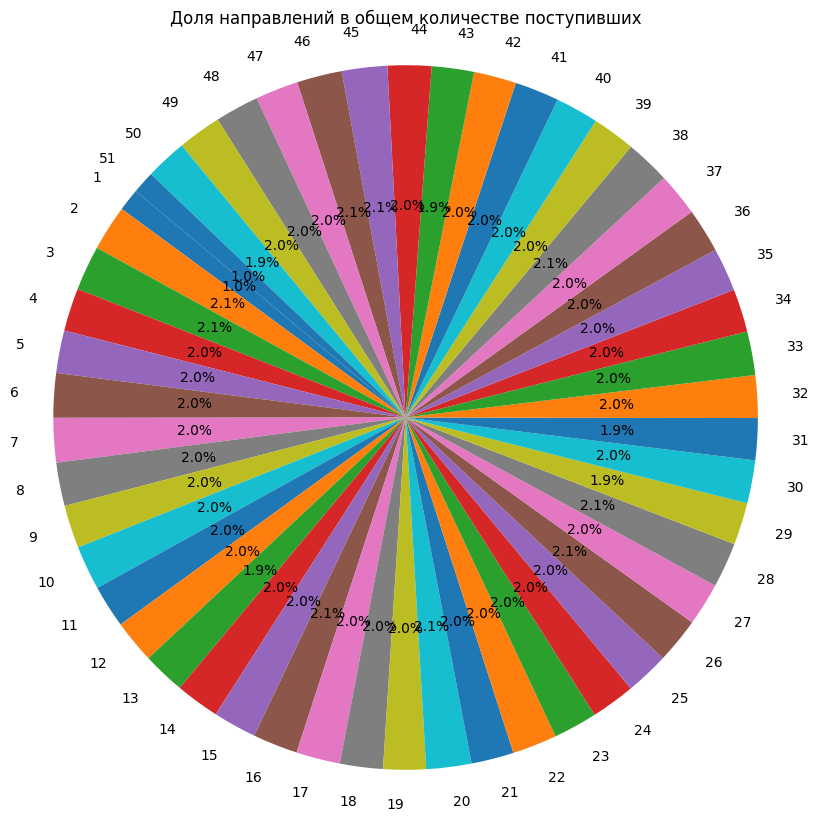

In [120]:
grouped_data = data.groupby('Направление').size().reset_index(name='Количество поступивших')
# Визуализация данных
plt.figure(figsize=(10, 10))
plt.pie(grouped_data['Количество поступивших'], labels=grouped_data['Направление'], autopct='%1.1f%%', startangle=140)
plt.title('Доля направлений в общем количестве поступивших')
plt.axis('equal')
plt.show()

In [181]:
total_rows = len(data)
years = list(range(1908, 2025))  # 117 лет
unique_directions = data['Направление'].unique()

# Общее количество комбинаций "Направление-Год"
total_combinations = len(unique_directions) * len(years)

# Расчет строк на каждую комбинацию
rows_per_combination = total_rows // total_combinations  # Основное количество строк на комбинацию
remaining_rows = total_rows % total_combinations         # Остаток строк

# Создание данных с равномерным распределением
d = []
for direction in unique_directions:
    for year in years:
        # Добавление базового количества строк для каждой комбинации
        d.extend([year] * rows_per_combination)

# Если есть оставшиеся строки, добавление их детерминированно
if remaining_rows > 0:
    # Создание списка всех комбинаций "Направление-Год"
    all_combinations = [(d, y) for d in unique_directions for y in years]
    
    # Добавление остатка строк, начиная с первой комбинации
    d.extend([y for _, y in all_combinations[:remaining_rows]])

data['Год поступления'] = d[:len(data)]
# Проверка результата
data['Год поступления'].value_counts().head()

Год поступления
1908    1475
1910    1475
1911    1475
1909    1475
1989    1474
Name: count, dtype: int64

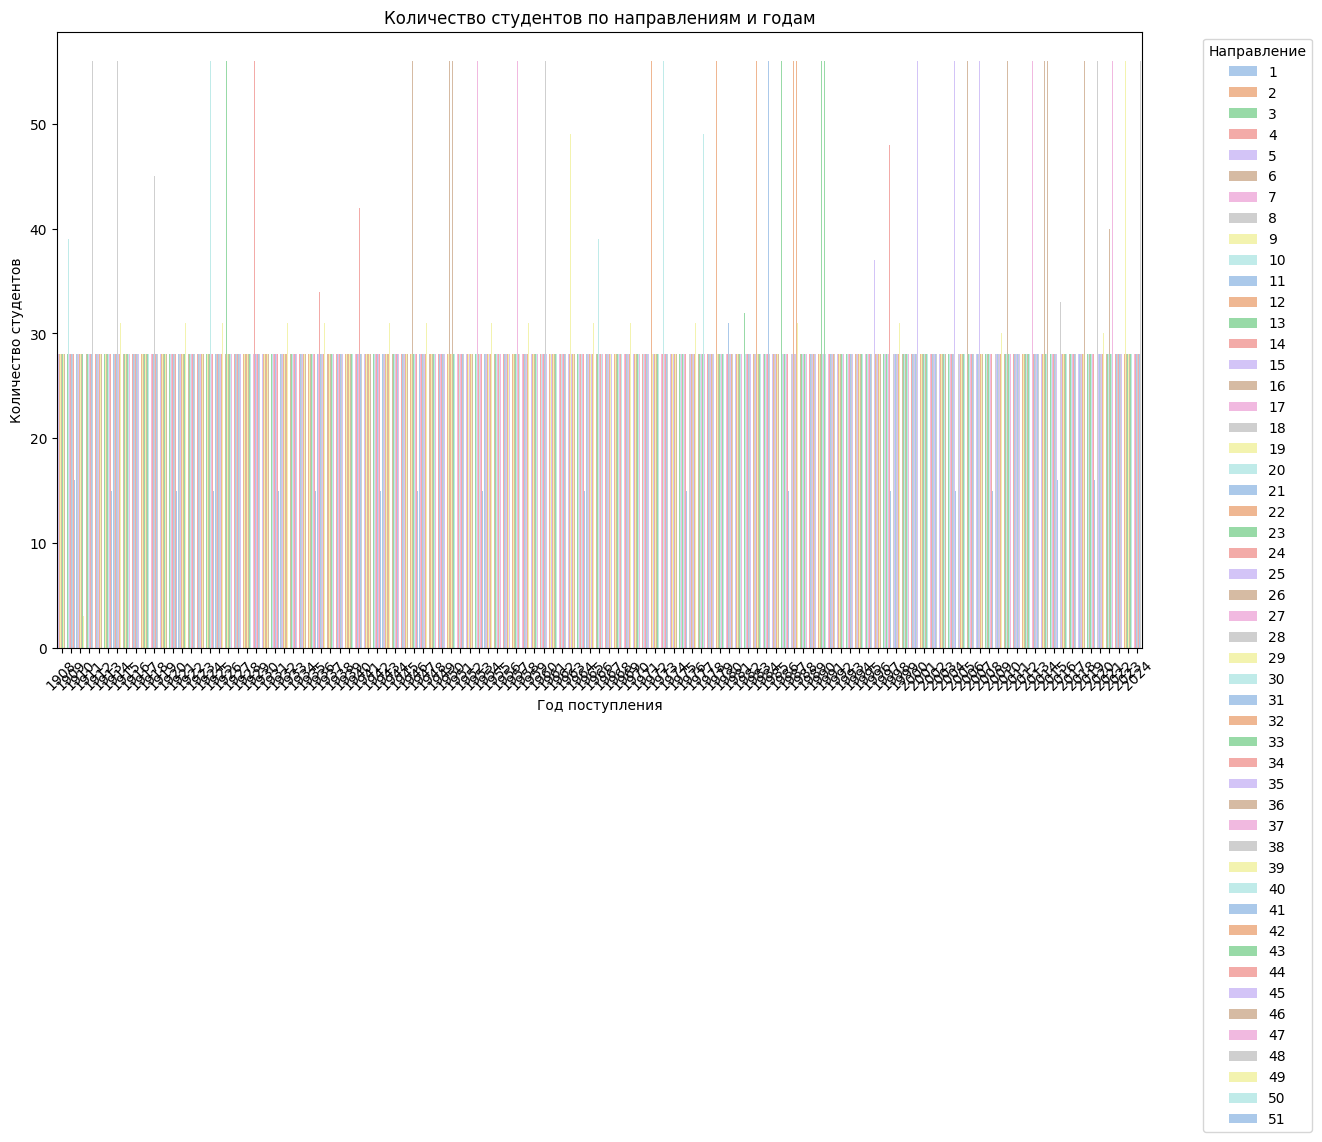

In [183]:
count_df = data.groupby(['Год поступления', 'Направление']).size().reset_index(name='Количество')
# Визуализация результатов
plt.figure(figsize=(14, 8))
sns.barplot(x='Год поступления', y='Количество', hue='Направление', data=count_df, palette='pastel')
plt.title('Количество студентов по направлениям и годам')
plt.xlabel('Год поступления')
plt.ylabel('Количество студентов')
plt.legend(title='Направление', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Поворот меток на оси X для удобства чтения
plt.show()

In [190]:
data.describe()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,...,Направление,Баллы ЕГЭ,Возраст,Пол,Волонтерство,Вступительный балл,Квота,Регион рождения,Уровень безработицы,Год поступления
count,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,...,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.000000,172462.00000
mean,49935.152674,26.021795,0.499029,174.958084,69.979878,1.512027,23.348610,98.600682,79.511470,114.534116,...,25.958084,184.503979,26.021795,0.499029,0.100274,69.979878,0.200138,69.979878,23.348610,1965.99869
std,27327.923945,4.628625,0.473223,14.455987,16.399224,1.057707,6.681502,0.473673,10.928609,13.629767,...,14.455987,35.575208,4.628625,0.473223,0.284263,16.399224,0.378805,16.399224,6.681502,33.77456
min,1.000000,18.000000,0.000000,150.000000,40.000578,0.000000,10.074837,96.397835,60.000000,90.000000,...,1.000000,120.000000,18.000000,0.000000,0.000000,40.000578,0.000000,40.000578,10.074837,1908.00000
25%,27825.250000,22.000000,0.000000,162.000000,56.698158,1.000000,18.402530,98.307939,71.000000,104.000000,...,13.000000,156.000000,22.000000,0.000000,0.000000,56.698158,0.000000,56.698158,18.402530,1937.00000
50%,49981.974488,26.022254,0.499803,175.000000,69.980827,1.512225,23.338982,98.601117,79.508817,114.564761,...,26.000000,184.499765,26.022254,0.499803,0.000000,69.980827,0.000000,69.980827,23.338982,1966.00000
75%,72033.500000,30.000000,1.000000,187.000000,83.244849,2.000000,27.236898,98.894530,88.000000,126.000000,...,38.000000,213.000000,30.000000,1.000000,0.000000,83.244849,0.200395,83.244849,27.236898,1995.00000
max,100000.000000,34.000000,1.000000,200.000000,99.999907,3.000000,44.355113,100.773765,99.000000,139.000000,...,51.000000,249.000000,34.000000,1.000000,1.000000,99.999907,1.000000,99.999907,44.355113,2024.00000


In [188]:
# Создание нового DataFrame
# Список нужных колонок
needed_columns = [
    'Год поступления',
    'Направление',
    'Баллы ЕГЭ',
    'Возраст',
    'Пол',
    'Волонтерство',
    'Вступительный балл',
    'Квота',
    'Регион рождения',
    'Уровень безработицы'
]

# Создание нового DataFrame с выбранными колонками
df = data[needed_columns]

output_file_path = 'dataset.csv'
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

In [189]:
df

,Год поступления,Направление,Баллы ЕГЭ,Возраст,Пол,Волонтерство,Вступительный балл,Квота,Регион рождения,Уровень безработицы
130295,1908,1,223.0,18.0,0.499803,0.000000,97.910800,0.0,97.910800,43.400523
128773,1908,1,160.0,27.0,0.000000,0.100237,63.742926,0.0,63.742926,28.326713
84782,1908,1,219.0,18.0,1.000000,0.000000,93.133557,0.0,93.133557,41.290430
184664,1908,1,161.0,30.0,1.000000,0.100237,71.457447,0.0,71.457447,31.645957
125291,1908,1,206.0,33.0,0.000000,0.000000,60.702052,0.0,60.702052,26.885288
...,...,...,...,...,...,...,...,...,...,...
127927,2024,51,242.0,24.0,0.000000,0.000000,82.055842,0.0,82.055842,23.338982
146222,1908,51,141.0,23.0,0.499803,0.000000,64.785847,0.0,64.785847,16.259916
94884,1909,51,157.0,32.0,0.000000,0.000000,71.577233,0.0,71.577233,17.980415
164550,1910,51,246.0,26.0,0.000000,0.000000,54.152584,0.0,54.152584,13.584797


In [ ]:
df_aggregated = df.groupby(['Направление', 'Год поступления']).size().reset_index(name='Количество абитуриентов')

# Добавление необходимых статистик
agg_funcs = {
    'Баллы ЕГЭ': 'mean',
    'Возраст': 'mean',
    'Пол': 'sum',
    'Волонтерство': 'sum',
    'Вступительный балл': 'mean',
    'Квота': 'sum',
    'Регион рождения': 'mean',
    'Уровень безработицы': 'mean'
}

agg_df = df.groupby(['Год поступления', 'Направление']).agg(agg_funcs).reset_index()

# Расчет доли женщин
agg_df['Доля женщин'] = agg_df['Пол'] / df_aggregated['Количество абитуриентов']
# Расчет доли по квоте
agg_df['Доля квоты'] = agg_df['Квота'] / df_aggregated['Количество абитуриентов']
# Расчет доли волонтерства
agg_df['Доля волонтерства'] = agg_df['Волонтерство'] / df_aggregated['Количество абитуриентов']

# Объединение данных
final_df = pd.merge(
    df_aggregated,
    agg_df.drop(columns=['Пол', 'Квота', 'Волонтерство']),
    on=['Год поступления', 'Направление']
)

final_df

,Направление,Год поступления,Количество абитуриентов,Баллы ЕГЭ,Возраст,Вступительный балл,Регион рождения,Уровень безработицы,Доля женщин,Доля квоты,Доля волонтерства
0,1,1908,28,182.124992,25.072223,71.091014,71.091014,30.884841,0.428543,0.164328,0.135782
1,1,1909,28,183.999983,25.787304,68.597981,68.597981,30.243387,0.428571,0.178642,0.192891
2,1,1910,28,175.321395,26.072223,67.962690,67.962690,29.121168,0.321400,0.228600,0.196471
3,1,1911,28,180.732118,25.750795,75.060359,75.060359,32.283449,0.374993,0.235757,0.182151
4,1,1912,28,176.607126,25.609527,69.188182,69.188182,30.110087,0.571414,0.157171,0.185731
...,...,...,...,...,...,...,...,...,...,...,...
5909,51,2020,16,178.874971,26.690282,73.919452,73.919452,18.153894,0.232136,0.250000,0.035714
5910,51,2021,16,171.343706,26.191673,75.627642,75.627642,19.325301,0.249972,0.221443,0.039294
5911,51,2022,16,181.749971,28.127782,68.570062,68.570062,17.008576,0.499961,0.173412,0.146698
5912,51,2023,16,192.093735,24.501391,73.412200,73.412200,19.715328,0.633320,0.080026,0.013365
